## Brachistochrone

To define the brachistochrone, consider a bead that slides over a curve under a uniform gravitational field. The curve that minimizes the time $T$ taken by the bead to go from a given point to another is the brachistochrone. Parametrizing the curve through the height $y(x)$ as a function of the horizontal coordinate $x$, we have
$$
T[y] = \int_{y_0}^{y_1} \sqrt{\frac{1 + y'(x)^2}{\max(y_0, y_1) - y}}.
$$

In [ ]:
%%capture
!pip install elvet

### Calculation

We use `elvet.minimizer` and `elvet.math.integral`.

In [8]:
import elvet

heights = 2, 1
distance = 3

def loss(x, y, dy_dx):
    dy_dx = dy_dx[:, 0]
    
    time = elvet.math.integral(
        (1 + dy_dx**2)**0.5 / (max(heights) - y)**0.5, x,
    )
    bc_loss = (y[0] - heights[0])**2 + (y[-1] - heights[1])**2
    
    return time + 1e2 * bc_loss

domain = elvet.box((0, distance, 100))
result = elvet.minimizer(loss, domain, epochs=30000)

 Elvet: epoch = 1, loss = 1.21e+02, elapsed time = 00:00:00
 Elvet: epoch = 10000, loss = 4.33e+00, elapsed time = 00:00:02
 Elvet: epoch = 20000, loss = 4.30e+00, elapsed time = 00:00:04
 Elvet: epoch = 30000, loss = 4.29e+00, elapsed time = 00:00:06


### Checks

The solution should be a cycloid.

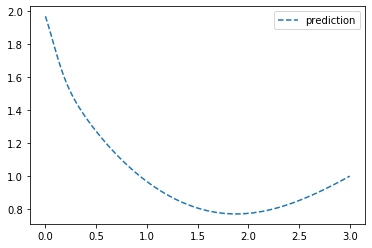

In [9]:
import elvet.plotting

elvet.plotting.plot_prediction(result)